In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

D:\Anaconda4.3.0\envs\tensorflow\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_Train,y_Train),(x_Test,y_Test)=mnist.load_data()

In [3]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [4]:
x_Train4D_normalize=x_Train4D / 255
x_Test4D_normalize=x_Test4D / 255

In [5]:
y_TrainOneHot=np_utils.to_categorical(y_Train)
y_TestOneHot=np_utils.to_categorical(y_Test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [8]:
model=Sequential()

In [10]:
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',activation='relu'))

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Dropout(0.25))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(128,activation='relu'))

In [20]:
model.add(Dropout(0.5))

In [21]:
model.add(Dense(10,activation='softmax'))

In [22]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 60s - loss: 0.4892 - acc: 0.8472 - val_loss: 0.0974 - val_acc: 0.9719
Epoch 2/10
 - 60s - loss: 0.1417 - acc: 0.9581 - val_loss: 0.0636 - val_acc: 0.9808
Epoch 3/10
 - 55s - loss: 0.1028 - acc: 0.9689 - val_loss: 0.0509 - val_acc: 0.9845
Epoch 4/10
 - 56s - loss: 0.0847 - acc: 0.9754 - val_loss: 0.0448 - val_acc: 0.9858
Epoch 5/10
 - 57s - loss: 0.0719 - acc: 0.9778 - val_loss: 0.0397 - val_acc: 0.9881
Epoch 6/10
 - 65s - loss: 0.0651 - acc: 0.9807 - val_loss: 0.0406 - val_acc: 0.9881
Epoch 7/10
 - 62s - loss: 0.0563 - acc: 0.9828 - val_loss: 0.0404 - val_acc: 0.9877
Epoch 8/10
 - 60s - loss: 0.0513 - acc: 0.9845 - val_loss: 0.0337 - val_acc: 0.9899
Epoch 9/10
 - 50s - loss: 0.0454 - acc: 0.9869 - val_loss: 0.0339 - val_acc: 0.9902
Epoch 10/10
 - 50s - loss: 0.0430 - acc: 0.9868 - val_loss: 0.0331 - val_acc: 0.9903


In [27]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

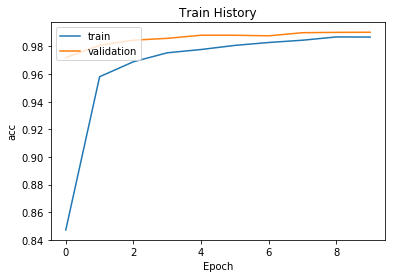

In [29]:
show_train_history(train_history,'acc','val_acc')

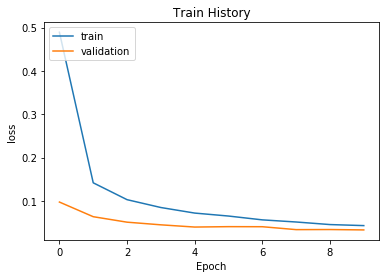

In [31]:
show_train_history(train_history,'loss','val_loss')

In [36]:
scores = model.evaluate(x_Test4D_normalize,y_TestOneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 4s 368us/step

accuracy= 0.9918


In [37]:
prediction=model.predict_classes(x_Test4D_normalize)

In [38]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [41]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title="label="+str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

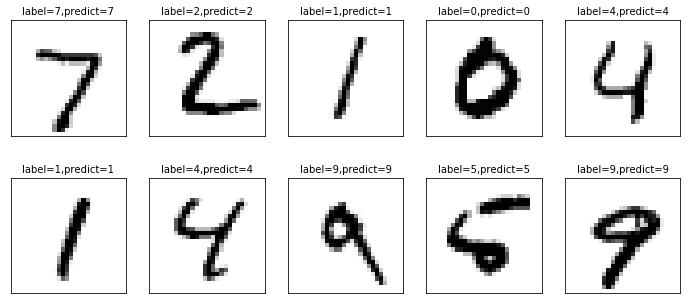

In [42]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [43]:
import pandas as pd
pd.crosstab(y_Test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,1,0,0,0,0,2,1,1,0
1,0,1131,1,0,0,1,0,1,1,0
2,3,0,1026,0,1,0,0,2,0,0
3,0,0,0,1004,0,2,0,2,2,0
4,0,0,0,0,974,0,1,0,1,6
5,1,0,0,4,0,884,2,0,0,1
6,4,2,0,0,2,1,949,0,0,0
7,1,1,4,2,0,0,0,1017,1,2
8,2,0,3,2,1,1,0,2,959,4
